In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [2]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [3]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [4]:
df.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [13]:
numeric_columns = df.loc[:,df.dtypes != object].columns
categorical_columns = df.loc[:,df.dtypes == object].columns

In [14]:
### Your code is here
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())


In [15]:
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].value_counts().index[0])

In [16]:
for col in categorical_columns:
    one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

In [17]:
df[numeric_columns].corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.114413,0.468332,-0.054654,-0.007686,-0.031388,0.200456,0.231706,0.135928
Customer_Since_Months,0.114413,1.000000,0.119279,-0.048969,-0.006180,-0.000977,0.041814,0.110851,0.027194
Life_Style_Index,0.468332,0.119279,1.000000,0.189165,0.068188,-0.045710,0.215944,0.303324,-0.073692
Customer_Rating,-0.054654,-0.048969,0.189165,1.000000,0.003595,-0.005398,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006180,0.068188,0.003595,1.000000,0.011711,0.095830,0.128686,0.185646
Var1,-0.031388,-0.000977,-0.045710,-0.005398,0.011711,1.000000,-0.025133,-0.020892,-0.013754
Var2,0.200456,0.041814,0.215944,-0.302968,0.095830,-0.025133,1.000000,0.683437,0.003437
Var3,0.231706,0.110851,0.303324,-0.227531,0.128686,-0.020892,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027194,-0.073692,-0.155279,0.185646,-0.013754,0.003437,-0.039309,1.000000


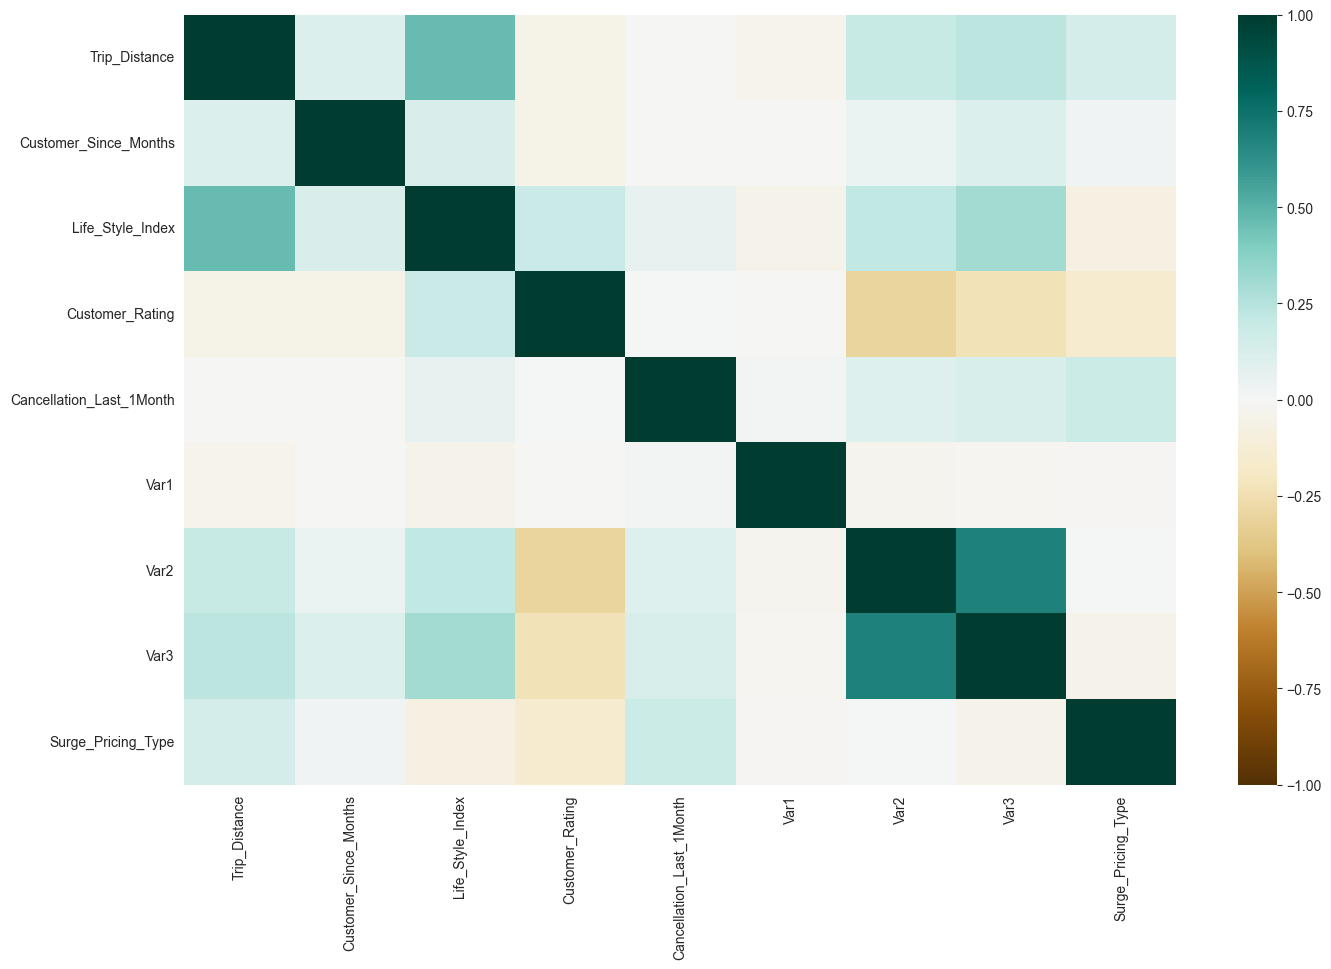

In [18]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(df[numeric_columns].corr(),
            xticklabels=numeric_columns,
            yticklabels=numeric_columns,
            cmap="BrBG",
            vmin=-1,
            vmax=1)

plt.show()

In [19]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
Var2                      Var3                  0.683437
Trip_Distance             Life_Style_Index      0.468332
Life_Style_Index          Var3                  0.303324
Customer_Rating           Var2                  0.302968
Trip_Distance             Var3                  0.231706
Customer_Rating           Var3                  0.227531
Life_Style_Index          Var2                  0.215944
Trip_Distance             Var2                  0.200456
Life_Style_Index          Customer_Rating       0.189165
Cancellation_Last_1Month  Surge_Pricing_Type    0.185646
dtype: float64


### Training

In [20]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop("Surge_Pricing_Type", axis=1)
Y = df["Surge_Pricing_Type"]

In [22]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y,
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [23]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

### Your code is here
pipe = Pipeline([('Scaler', StandardScaler()), ("one_vs_all", OneVsRestClassifier(LogisticRegression()))])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [24]:
from sklearn.metrics import classification_report

Y_pred = pipe.predict(X_test)
print(classification_report(Y_test, Y_pred, digits=3))


              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score


print(f"""Precision равно: {precision_score(Y_test,
                                            pipe.predict(X_test),
                                            average='macro'):.3f}""" )

print(f"""Recall равно: {recall_score(Y_test,
                                      pipe.predict(X_test),
                                      average='macro'):.3f}""" )

print(f"""F-мера равно: {f1_score(Y_test,
                                  pipe.predict(X_test),
                                  average='macro'):.3f}""" )

Precision равно: 0.700
Recall равно: 0.649
F-мера равно: 0.662


In [27]:
print(f"""Precision равно: {precision_score(Y_test,
                                            pipe.predict(X_test),
                                            average='micro'):.3f}""" )

print(f"""Recall равно: {recall_score(Y_test,
                                      pipe.predict(X_test),
                                      average='micro'):.3f}""" )

print(f"""F-мера равно: {f1_score(Y_test,
                                  pipe.predict(X_test),
                                  average='micro'):.3f}""" )

Precision равно: 0.679
Recall равно: 0.679
F-мера равно: 0.679


Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [28]:
print(f"""Precision равно: {precision_score(Y_test,
                                            pipe.predict(X_test),
                                            average='weighted'):.3f}""" )

print(f"""Recall равно: {recall_score(Y_test,
                                      pipe.predict(X_test),
                                      average='weighted'):.3f}""" )

print(f"""F-мера равно: {f1_score(Y_test,
                                  pipe.predict(X_test),
                                  average='weighted'):.3f}""" )

Precision равно: 0.692
Recall равно: 0.679
F-мера равно: 0.673


In [40]:
Y_test_copy = Y_test.copy()

In [42]:
one_hot_Y_tets = pd.get_dummies(Y_test)

Y_test_copy = pd.concat((Y_test, one_hot_Y_tets), axis=1)

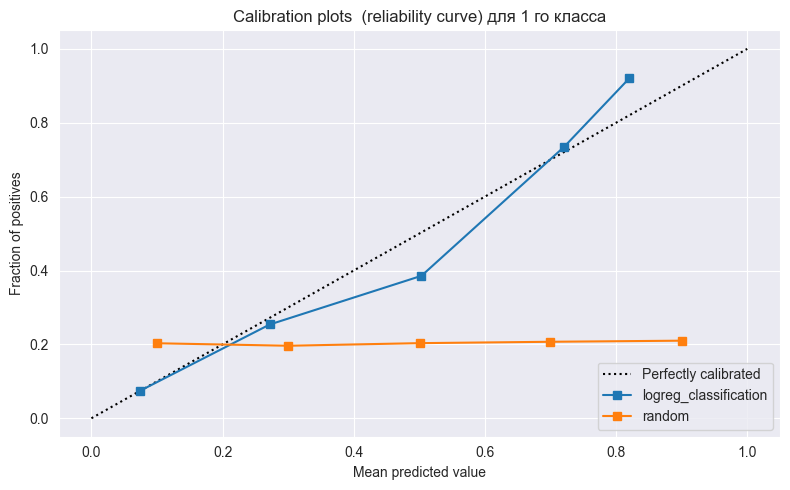

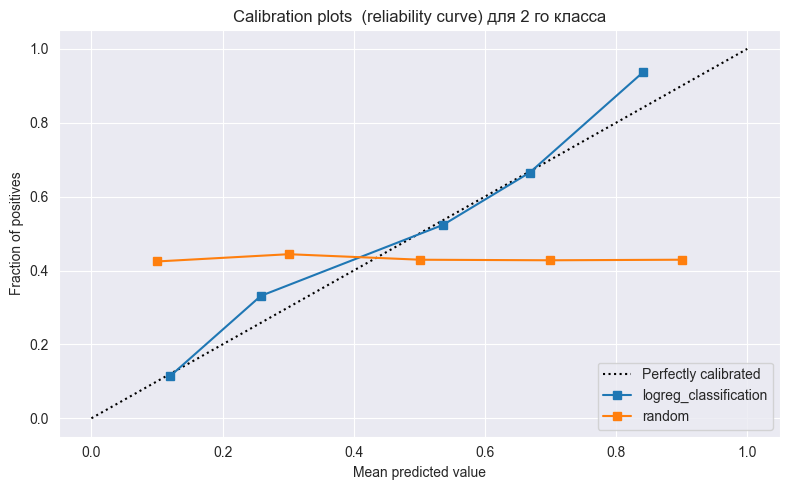

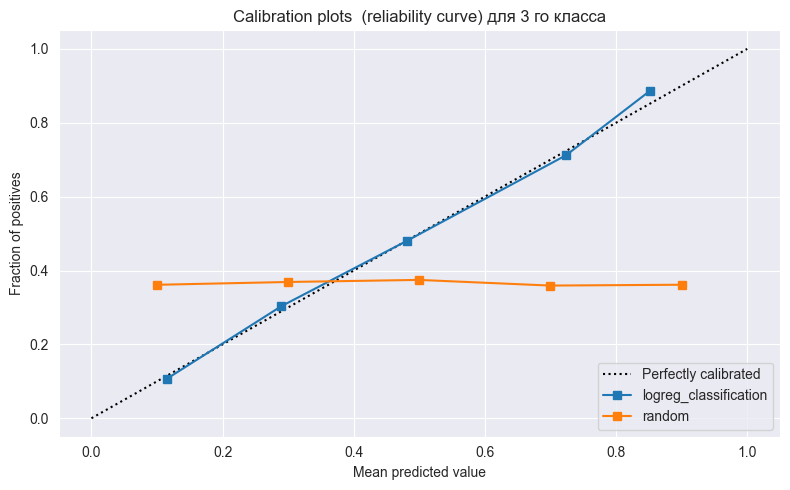

In [67]:
#Изобразим калибровочные кривые для каждого one vs rest классификатора в цикле
from sklearn.calibration import calibration_curve
for i in range(3):
    ax1 = fig.add_subplot(2, 2, i+1)
    plt.figure(figsize=(8, 5))
    plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    ### Предсказания модели на тесте и соответствующая калибровочная кривая
    prob_pos = pipe.predict_proba(X_test)[:, i]
    fraction_of_positives, mean_predicted_value = calibration_curve(Y_test_copy[i + 1], prob_pos)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="logreg_classification")

    ### Пусть наши предсказания - случайные, то есть для каждого объекта
    ### вероятность принадлежности + классу это просто случайное число [0; 1]
    prob_pos = np.random.uniform(size=(X_test.shape[0],))
    fraction_of_positives, mean_predicted_value = calibration_curve(Y_test_copy[i+1], prob_pos)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="random")

    plt.ylabel("Fraction of positives")
    plt.xlabel("Mean predicted value")
    plt.ylim([-0.05, 1.05])
    plt.legend(loc="lower right")
    plt.title(f'Calibration plots  (reliability curve) для {i+1} го класса')
    plt.tight_layout()

In [69]:
param_grid = {'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1]}

In [72]:
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(pipe, param_grid)

search.fit(X_train, Y_train)

print(f'Best parametr (CV score = {search.best_score_:.3f}):')
print(search.best_params_)



Best parametr (CV score = 0.681):
{'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}


In [73]:
print(classification_report(Y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.742     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.649      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

In [9]:
### Your code is here



**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [79]:
numeric_columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [89]:
### Создание полиномиальных признаков

X_polinomial = X.copy()


### Your code is here

In [90]:
for i in range(2, 5):
    for col in numeric_columns.drop("Surge_Pricing_Type"):
        X_polinomial[f"{col}_{i}"] = X_polinomial[col] ** i

In [91]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, Y,
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [92]:
pipe_pol = Pipeline([('Scaler', StandardScaler()), ("one_vs_all", OneVsRestClassifier(LogisticRegression(penalty="l2", C=0.001)))])

pipe_pol.fit(X_pol_train, y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.001)))])

In [93]:
print(classification_report(y_test, pipe_pol.predict(X_pol_test), digits=3))

              precision    recall  f1-score   support

           1      0.748     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.741     0.584     0.653      9612

    accuracy                          0.682     26333
   macro avg      0.708     0.651     0.666     26333
weighted avg      0.697     0.682     0.677     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

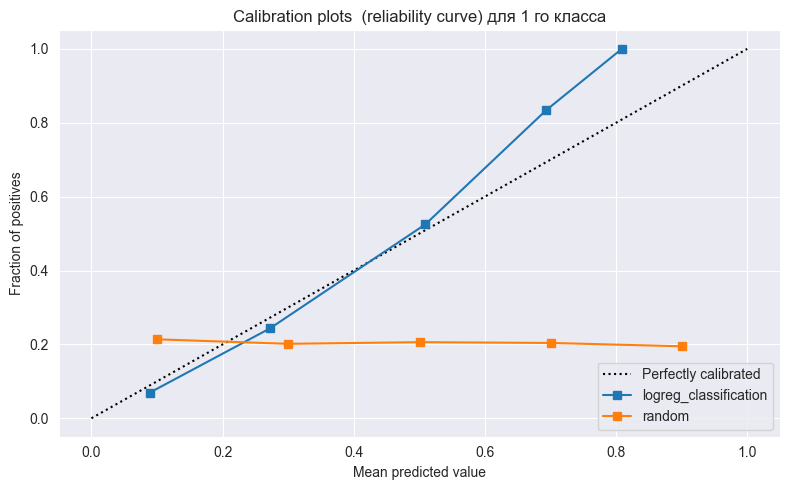

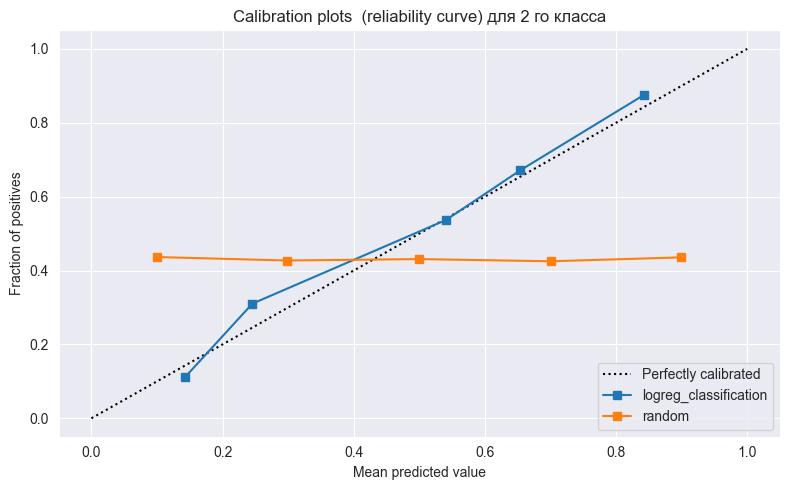

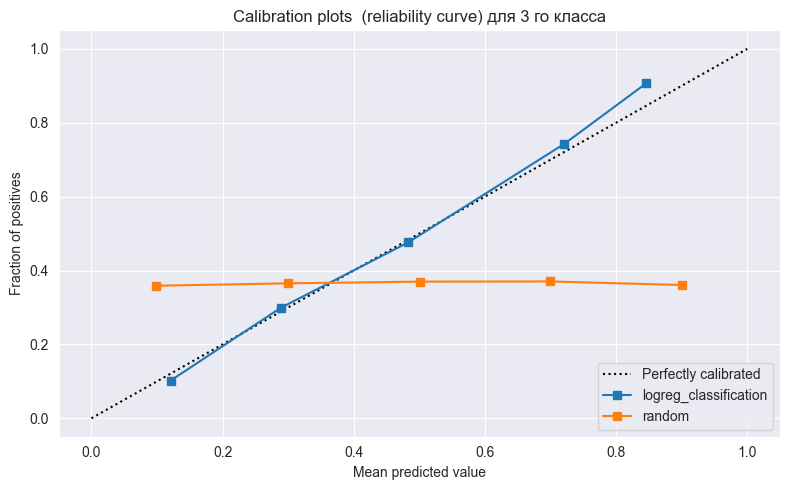

In [95]:
y_test_copy = y_test.copy()
one_hot_y_tets = pd.get_dummies(y_test)

y_test_copy = pd.concat((y_test, one_hot_y_tets), axis=1)
for i in range(3):
    ax1 = fig.add_subplot(2, 2, i+1)
    plt.figure(figsize=(8, 5))
    plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    ### Предсказания модели на тесте и соответствующая калибровочная кривая
    prob_pos = pipe_pol.predict_proba(X_pol_test)[:, i]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_copy[i + 1], prob_pos)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="logreg_classification")

    ### Пусть наши предсказания - случайные, то есть для каждого объекта
    ### вероятность принадлежности + классу это просто случайное число [0; 1]
    prob_pos = np.random.uniform(size=(X_test.shape[0],))
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test_copy[i+1], prob_pos)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="random")

    plt.ylabel("Fraction of positives")
    plt.xlabel("Mean predicted value")
    plt.ylim([-0.05, 1.05])
    plt.legend(loc="lower right")
    plt.title(f'Calibration plots  (reliability curve) для {i+1} го класса')
    plt.tight_layout()


**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [104]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y,
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [106]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

pipe_one_vs_one = Pipeline([('Scaler', StandardScaler()), ("one_vs_one", OneVsOneClassifier(SGDClassifier()))])

pipe_one_vs_one.fit(X_train, Y_train)
print(classification_report(Y_test, pipe_one_vs_one.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.738     0.524     0.613      5372
           2      0.625     0.873     0.729     11349
           3      0.760     0.527     0.623      9612

    accuracy                          0.676     26333
   macro avg      0.708     0.641     0.655     26333
weighted avg      0.697     0.676     0.666     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [107]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [108]:
search = GridSearchCV(pipe_one_vs_one, param_grid)

search.fit(X_train, Y_train)

print(f'Best parametr (CV score = {search.best_score_:.5f}):')
print(search.best_params_)



Best parametr (CV score = 0.68098):
{'one_vs_one__estimator__alpha': 0.1, 'one_vs_one__estimator__loss': 'modified_huber', 'one_vs_one__estimator__penalty': 'l2'}


In [109]:
print(classification_report(Y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.747     0.530     0.620      5372
           2      0.632     0.849     0.724     11349
           3      0.748     0.565     0.644      9612

    accuracy                          0.680     26333
   macro avg      0.709     0.648     0.663     26333
weighted avg      0.698     0.680     0.674     26333



Можно ли однозначно сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?